In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/nogibjj/Individual_Proj_2_Gavin_Li/main/resources/train.csv"
)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survival_rate_by_sex = df.groupby("Sex").mean(numeric_only=True).Survived

In [5]:
survival_rate_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
for_plot = (
    df.groupby(
        [
            "Survived",
            "Sex",
        ]
    )
    .Pclass.count()
    .reset_index()
)
# for_plot
sur = for_plot[for_plot["Survived"] == 1].Pclass.tolist()
not_sur = for_plot[for_plot["Survived"] == 0].Pclass.tolist()
not_sur

[81, 468]

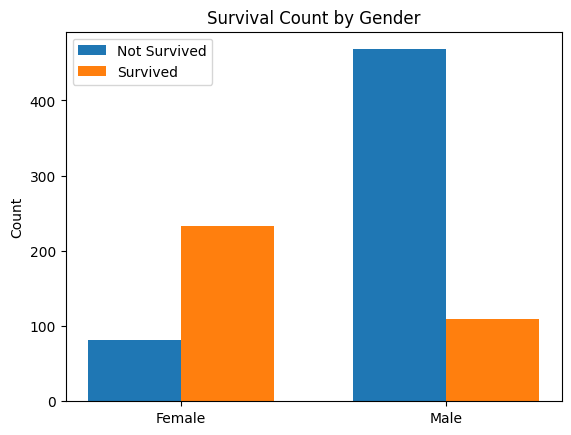

In [7]:
width = 0.35
labels = ["Female", "Male"]
x = np.arange(2)
fig, ax = plt.subplots()
bars1 = ax.bar(x - width / 2, not_sur, width, label="Not Survived")
bars2 = ax.bar(x + width / 2, sur, width, label="Survived")

ax.set_ylabel("Count")
ax.set_title("Survival Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()